

__Título TFM: Modelos de Aprendizaje Automático para procesos de auditoría contables__

__Alumna: Alba Mena Vera__

__Variable objetivo : Grupo de gastos __

#Introducción

La BBDD ha sido obtenido de la página web de datos del Gobierno de España.

La plataforma datos.gob.es se constituye como el punto de encuentro entre las administraciones, las empresas y los ciudadanos interesados en la apertura de la información pública y en el desarrollo de servicios avanzados basados en datos.

Datos.gob.es permite la interacción del visitante y ofrece visibilidad a las actuaciones que se realizan en el marco de la Iniciativa Aporta, la estrategia de datos abiertos de España.

Datos.gob.es que organiza y gestiona el Catálogo de Información Pública del sector público. Asimismo, desde la plataforma proporciona información general, materiales formativos y noticias de actualidad sobre la reutilización de la información del sector público.

El conjunto de datos que voy a utilizar es la Facturación de CTPDA de Andalucia y su grupo de gastos como variable objetivo clasificadora.


# Conocimiento y limpieza del dataset:

## Librerías necesarias

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
#import plotly.tools as tls
#from plotly.offline import init_notebook_mode, iplot, plot
#import plotly.graph_objs as go
import seaborn as sns
import datetime

Link a la base de datos
https://www.juntadeandalucia.es/datosabiertos/portal/dataset/facturacion

## Lectura de la fuente de datos

In [9]:
df=pd.read_excel('facturacion-may-24u.xlsx')

Se leen las primeras 5 líneas del dataset para dar una visión general de su contenido:

In [11]:
df

,Fecha Entrada Registro,Importe Total,GRUPO DE GASTOS,SUBGRUPO,Denominación Factura,Denominación Acreedor
0,2019-01-10,0.33,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 5 VOZ FIJA SEPTIEMBR,TELEFONICA DE ESPAÑA SAU TELEFONICA
1,2021-02-03,1.00,VEHÍCULO OFICIAL,"COMBUSTIBLE,LAVADOS Y OTROS",LAVADOS ENERO 21,SOLRED SA
2,2023-06-26,1.00,ACTIVIDAD DEL CONSEJO,PROTOCOLO,"COMISION ENTE, C, PROTOC,",EXCMO CABILDO DE LA S M Y P I CATED
3,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 MARZO,TELEFONICA DE ESPAÑA SAU TELEFONICA
4,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 ABRIL,TELEFONICA DE ESPAÑA SAU TELEFONICA
...,...,...,...,...,...,...
2699,2020-06-02,9376.87,SEDE,MANTENIMIENTO,"VIG–SEG,CTPDA 1 A 31/05",SECURITY WORLD SA
2700,2021-11-26,9408.57,ACTIVIDAD DEL CONSEJO,MATERIAL INFORMÁTICO Y OFICINA,"CABINA ALMACENAM, SAN","SOLUTIA INNOVAWORLD TECHNOLOGIES, S"
2701,2022-03-02,9519.07,ACTIVIDAD DEL CONSEJO,DOCUMENTACIÓN Y PUBLICACIONES,"RENOV,SUSCRIPBD 2022",EDITORIAL ARANZADI SAU
2702,2021-12-21,9747.51,ACTIVIDAD DEL CONSEJO,PLANES Y PROGRAMAS,"DES, DE SIST,INF, NOV,21",SOLTEL IT SOLUTIONS SLU


Eliminamos los duplicados que pueda haber

In [13]:
df=df.drop_duplicates()
df

,Fecha Entrada Registro,Importe Total,GRUPO DE GASTOS,SUBGRUPO,Denominación Factura,Denominación Acreedor
0,2019-01-10,0.33,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 5 VOZ FIJA SEPTIEMBR,TELEFONICA DE ESPAÑA SAU TELEFONICA
1,2021-02-03,1.00,VEHÍCULO OFICIAL,"COMBUSTIBLE,LAVADOS Y OTROS",LAVADOS ENERO 21,SOLRED SA
2,2023-06-26,1.00,ACTIVIDAD DEL CONSEJO,PROTOCOLO,"COMISION ENTE, C, PROTOC,",EXCMO CABILDO DE LA S M Y P I CATED
3,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 MARZO,TELEFONICA DE ESPAÑA SAU TELEFONICA
4,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 ABRIL,TELEFONICA DE ESPAÑA SAU TELEFONICA
...,...,...,...,...,...,...
2699,2020-06-02,9376.87,SEDE,MANTENIMIENTO,"VIG–SEG,CTPDA 1 A 31/05",SECURITY WORLD SA
2700,2021-11-26,9408.57,ACTIVIDAD DEL CONSEJO,MATERIAL INFORMÁTICO Y OFICINA,"CABINA ALMACENAM, SAN","SOLUTIA INNOVAWORLD TECHNOLOGIES, S"
2701,2022-03-02,9519.07,ACTIVIDAD DEL CONSEJO,DOCUMENTACIÓN Y PUBLICACIONES,"RENOV,SUSCRIPBD 2022",EDITORIAL ARANZADI SAU
2702,2021-12-21,9747.51,ACTIVIDAD DEL CONSEJO,PLANES Y PROGRAMAS,"DES, DE SIST,INF, NOV,21",SOLTEL IT SOLUTIONS SLU


Observamos que no hay duplicados

## Tipos de variables y cantidad de instacias

Compruebo los tipos y la cantidad de instancia. De este resultado compruebo que el conjunto de datos tiene **2704  filas o instancias y 6 columnas o variables**:

In [17]:
print(df.shape)

(2704, 6)


También puedo ver que variables son numéricas y cuales categóricas, las numéricas potencialmente no tendré que cambiar nada de ellas. Compruebo los tipos de variables que contiene el dataset con dtypes:

In [19]:
print(df.dtypes)

Fecha Entrada Registro    datetime64[ns]
Importe Total                    float64
GRUPO DE GASTOS                   object
SUBGRUPO                          object
Denominación Factura              object
Denominación Acreedor             object
dtype: object


Esto es otra forma de ver el tipo de variables que tengo, Compruebo de que tipo son mis variables:
object=variables alfanumericas, datetime fecha, entero... Vemos que todas son object

Renombramos las variables para que sea más cómodo

In [22]:
df.rename(columns={'Fecha Entrada Registro':'fecha_entrada_registro',
                        'Importe Total':'importe_total','GRUPO DE GASTOS': 'grupo_gastos','SUBGRUPO':'subgrupo','Denominación Factura':'denominacion_factura','Denominación Acreedor':'denominacion_acreedor'   },
               inplace=True)
df.columns

Index(['fecha_entrada_registro', 'importe_total', 'grupo_gastos', 'subgrupo',
       'denominacion_factura', 'denominacion_acreedor'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_entrada_registro  2704 non-null   datetime64[ns]
 1   importe_total           2704 non-null   float64       
 2   grupo_gastos            2704 non-null   object        
 3   subgrupo                2704 non-null   object        
 4   denominacion_factura    2704 non-null   object        
 5   denominacion_acreedor   2703 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 126.9+ KB


A continuación veo el número de columnas de mi dataset

In [25]:
df.columns

Index(['fecha_entrada_registro', 'importe_total', 'grupo_gastos', 'subgrupo',
       'denominacion_factura', 'denominacion_acreedor'],
      dtype='object')

In [26]:
df.describe()

,fecha_entrada_registro,importe_total
count,2704,2704.000000
mean,2020-02-09 08:09:56.449704192,4140.458861
min,2016-02-09 00:00:00,-327196.000000
25%,2018-02-19 18:00:00,72.342500
50%,2019-12-18 00:00:00,195.610000
75%,2021-12-16 06:00:00,680.762500
max,2023-12-28 00:00:00,891437.000000
std,NaN,42282.723913


In [27]:
print(df.isnull().sum())

fecha_entrada_registro    0
importe_total             0
grupo_gastos              0
subgrupo                  0
denominacion_factura      0
denominacion_acreedor     1
dtype: int64


### Valores perdidos
Compruebo los valores que son nulos en cada una de las variables del dataset.

#### Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor. El siguiente mapa de calor muestra en amarillo los missing values de cada variable.


<Axes: >

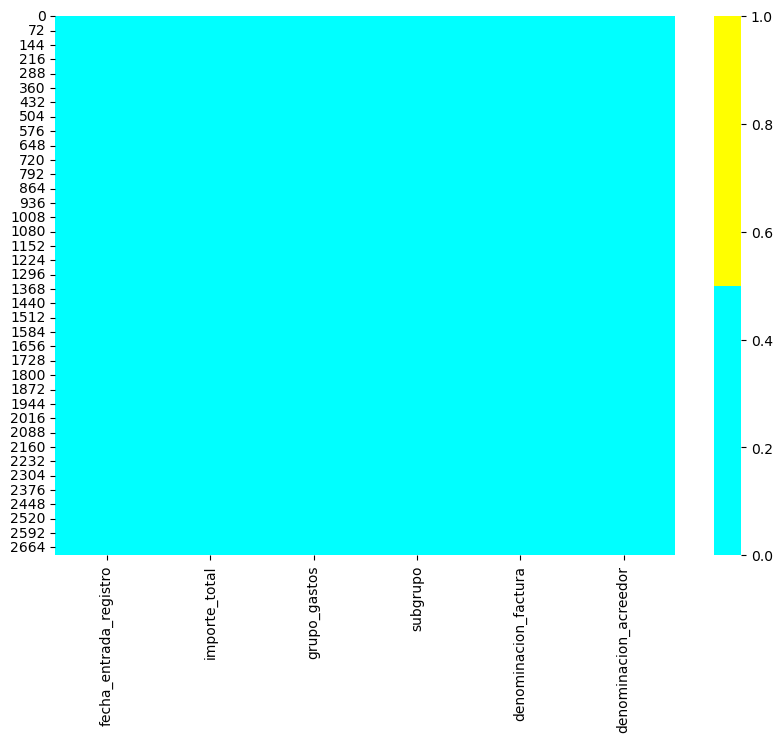

In [30]:
cols = df.columns[:7] # quiero ver todas mis columnas
colours = ['#00FFFF', '#ffff00'] # Especifica el color - amarillo es missing y azul no es missing.
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Porcentaje de missing values

Observamos que no hay missing values en nuestro data set.

fecha_entrada_registro - 0%
importe_total - 0%
grupo_gastos - 0%
subgrupo - 0%
denominacion_factura - 0%
denominacion_acreedor - 0%


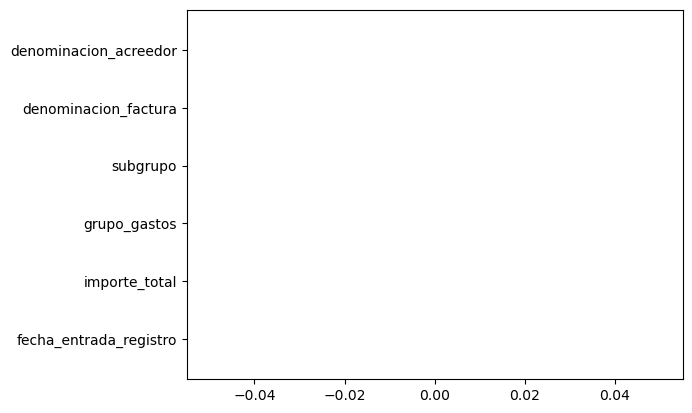

In [32]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

In [33]:
###Convertir variables de tipo string a valores numéricas

In [34]:
###Consolidación de la variable grupo_gastos 

grupo_gastos
COMUNICACIONES                             593
SEDE                                       558
ACTIVIDAD                                  430
ACTIVIDAD DEL CONSEJO                      341
INDEMNIZACIONES POR RAZÓN DEL SERVICIO     335
INDEMNIZACIÓN RAZÓN SERVICIO               138
VEHÍCULO OFICIAL                           113
ENCOMIENDAS                                 85
ENCARGO A MEDIO PROPIO                      49
VEHíCULO OFICIAL                            20
INDEMNIZACIONES POR RAZÓN  DEL SERVICIO     19
ENCOMIENDA                                  11
INDEMNIZACIÓN                                6
MATERIAL INFORMÁTICO Y DE OFICINA            3
VEHÍCULO                                     2
Í                                            1
Name: count, dtype: int64 Index(['COMUNICACIONES', 'SEDE', 'ACTIVIDAD', 'ACTIVIDAD DEL CONSEJO',
       'INDEMNIZACIONES POR RAZÓN DEL SERVICIO',
       'INDEMNIZACIÓN RAZÓN SERVICIO', 'VEHÍCULO OFICIAL', 'ENCOMIENDAS',
       'ENCARGO

<Axes: ylabel='grupo_gastos'>

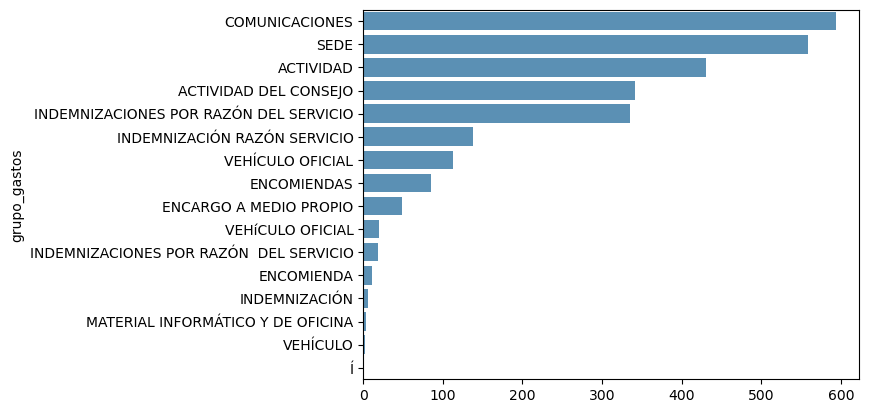

In [35]:
x=df['grupo_gastos'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [36]:
df['grupo_gastos'].value_counts()

grupo_gastos
COMUNICACIONES                             593
SEDE                                       558
ACTIVIDAD                                  430
ACTIVIDAD DEL CONSEJO                      341
INDEMNIZACIONES POR RAZÓN DEL SERVICIO     335
INDEMNIZACIÓN RAZÓN SERVICIO               138
VEHÍCULO OFICIAL                           113
ENCOMIENDAS                                 85
ENCARGO A MEDIO PROPIO                      49
VEHíCULO OFICIAL                            20
INDEMNIZACIONES POR RAZÓN  DEL SERVICIO     19
ENCOMIENDA                                  11
INDEMNIZACIÓN                                6
MATERIAL INFORMÁTICO Y DE OFICINA            3
VEHÍCULO                                     2
Í                                            1
Name: count, dtype: int64

In [37]:
import unicodedata
# Función para eliminar tildes
def quitar_tildes(texto):
    # Check if the input is a string, if not convert to string
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')


def consolidar(x):
    # Quita tildes y normaliza el input
    x = quitar_tildes(x).upper().strip()

    if x == 'ACTIVIDAD' or x == 'ACTIVIDAD DEL CONSEJO':
        return 'ACTIVIDAD'
    elif x in ['INDEMNIZACIONES POR RAZON DEL SERVICIO', 'INDEMNIZACION RAZON SERVICIO', 'INDEMNIZACIONES POR RAZON DEL SERVICIO', 'INDEMNIZACION', 'INDEMNIZACIONES POR RAZON DEL SERVICIO','INDEMNIZACIONES POR RAZON  DEL SERVICIO']:
        return 'INDEMNIZACIONES'
    elif x in ['VEHICULO OFICIAL', 'VEHICULO','I']:
        return 'VEHICULO'
    elif x in ['ENCOMIENDAS', 'ENCOMIENDA']:
        return 'ENCOMIENDAS'
    elif x in ['MATERIAL INFORMATICO Y OFICINA', 'MATERIAL INFORMATICO Y DE OFICINA', 'MATERIAL INFORMATICO Y OF.']:
        return 'ACTIVIDAD'
    elif x in ['SUMINISTROS', 'SUMINISTRO']:
        return 'SUMINISTRO'
    elif x in ['PUBLICIDAD Y COMUNICACION', 'CAMPANAS PUBLICIDAD', 'PUBLICIDAD Y DOCUMENTACION', 'PUBLICIDAD']:
        return 'PUBLICIDAD'
    elif x in ['COMBUSTIBLE Y LAVADOS', 'COMBUSTIBLE, LAVADOS Y OTROS', 'COMBUSTIBLE-LAVADO']:
        return 'COMBUSTIBLE Y LAVADOS'
    elif x in ['REUNIONES, CONFERENCIAS Y CURSOS', 'REUNIONES Y CONFERENCIAS']:
        return 'REUNIONES, CONFERENCIAS Y CURSOS'
    elif x in ['ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTNCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES']:
        return 'ASISTENCIA SESIONES COMISION CONSULTIVA'
    elif x in ['TELEFONIA-INTERNET', 'TELEFONIA E INTERNET']:
        return 'TELEFONIA E INTERNET'
    elif x in ['SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO DE GESTION DE INFR. TIC']:
        return 'SERV. GESTION INFRAESTRUCTURAS TIC'
    elif x in ['FORMACION INTERNA']:
        return 'FORMACION INTERNA'
    elif x in ['ADQUISICION', 'ADQ LIBROS/DOCUMENTACION']:
        return 'ADQUISICION'
    elif x in ['GASTOS CONTENCIOSOS', 'GASTOS CONTENCIOSO']:
        return 'GASTOS CONTENCIOSOS'
    elif x in ['MANTENIMIENTO', 'MANTENIMIENTO COCHE']:
        return 'MANTENIMIENTO'
    elif x in ['VESTUARIO', 'VESTUARIO PERSONAL LABORAL']:
        return 'VESTUARIO'
    elif x == 'COMUNICACIONES':
        return 'COMUNICACIONES'
    elif x == 'SEDE':
        return 'SEDE'
    else:
        return x

df['grupo_gastos'] = df['grupo_gastos'].apply(quitar_tildes)
df['grupo_gastos_n'] = df['grupo_gastos'].map(lambda x: consolidar(x))

In [38]:
df['grupo_gastos_n'].value_counts()

grupo_gastos_n
ACTIVIDAD                 774
COMUNICACIONES            593
SEDE                      558
INDEMNIZACIONES           498
VEHICULO                  136
ENCOMIENDAS                96
ENCARGO A MEDIO PROPIO     49
Name: count, dtype: int64

grupo_gastos_n
ACTIVIDAD                 774
COMUNICACIONES            593
SEDE                      558
INDEMNIZACIONES           498
VEHICULO                  136
ENCOMIENDAS                96
ENCARGO A MEDIO PROPIO     49
Name: count, dtype: int64 Index(['ACTIVIDAD', 'COMUNICACIONES', 'SEDE', 'INDEMNIZACIONES', 'VEHICULO',
       'ENCOMIENDAS', 'ENCARGO A MEDIO PROPIO'],
      dtype='object', name='grupo_gastos_n')


<Axes: ylabel='grupo_gastos_n'>

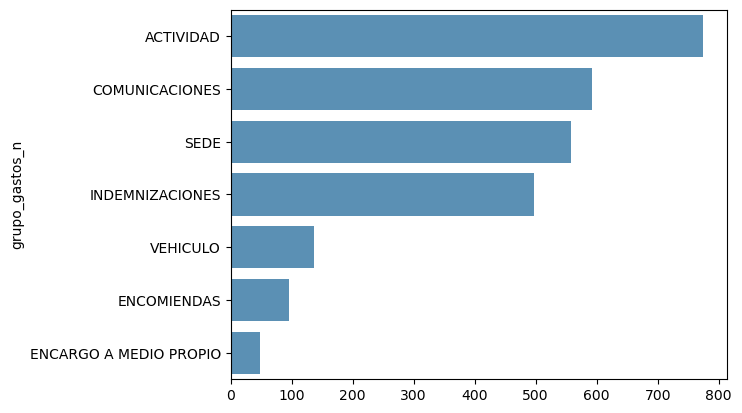

In [39]:
x=df['grupo_gastos_n'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [40]:
def grupogastoscod(x): 
    if x=="ACTIVIDAD" :
        return 0 
    elif x=="COMUNICACIONES" :
        return 1
    elif x=="ENCARGO A MEDIO PROPIO" :
        return 2 
    elif x=="ENCOMIENDAS" :
        return 3
    elif x=="INDEMNIZACIONES" :
        return 4
    elif x=="SEDE" :
        return 5
    else :
        return 6
df['df_GrupoGastos'] =df['grupo_gastos'].map(lambda x: grupogastoscod(x))


In [41]:
###Consolidación de la variable subgrupo

subgrupo
TELEFONÍA-INTERNET                    467
DIETAS                                446
MANTENIMIENTO                         364
MATERIAL INFORMÁTICO Y DE OFICINA     209
POSTAL                                120
                                     ... 
MATERIAL INFORMÁTICO  Y DE OFICINA      1
MATERIAL INFORMÁTICO Y OF,              1
ADQ,LIBROS/DOCUMENTACIÓN                1
FORMACION INTERNA                       1
IDENTIDAD CORPORATIVA                   1
Name: count, Length: 67, dtype: int64 Index(['TELEFONÍA-INTERNET', 'DIETAS', 'MANTENIMIENTO',
       'MATERIAL INFORMÁTICO Y DE OFICINA', 'POSTAL', 'SUMINISTROS',
       'GASTOS CONTENCIOSOS', 'SANDETEL', 'DOCUMENTACIÓN Y PUBLICACIONES',
       'COMBUSTIBLE Y LAVADOS', 'PLANES Y PROGRAMAS', 'TRIBUTOS',
       'ADQ, LIBROS / DOCUMENTACIÓN', 'FORMACIÓN INTERNA',
       'SERV, GESTIÓN INFRAESTRUCTURAS TIC', 'SUMINISTRO',
       'REUNIONES, CONFERENCIAS Y CURSOS', 'MATERIAL INFORMÁTICO Y OFICINA',
       'MATERIAL INFORMÁTICO Y

<Axes: ylabel='subgrupo'>

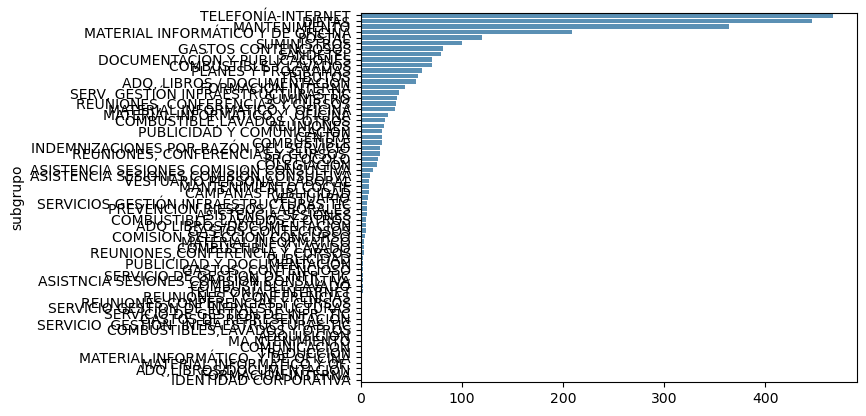

In [42]:
x=df['subgrupo'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [43]:
import unicodedata
# Función para eliminar tildes
def quitar_tildes(texto):
    # Check if the input is a string, if not convert to string
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

def discretiza_subgrupo(subgrupo):

    if subgrupo in ['TELEFONIA-INTERNET', 'TELEFONIA E INTERNET']:
        return 'TELEFONIA E INTERNET'
    elif subgrupo in ['MATERIAL INFORMATICO Y DE OFICINA', 'MATERIAL INFORMATICO Y OFICINA', 'MATERIAL INFORMATICO Y OF.','MATERIAL INFORMATICO','MATERIAL INFORMATICO Y DE OFICINA','MATERIAL INFORMATICO Y OFICINA','MATERIAL INFORMATICO Y OF','MATERIAL INFORMATICO Y OFICINA','MATERIAL INFORMATICO Y OF,',
      'MATERIAL INFORMATICO  Y DE OFICINA','MATERIAL INFORMATICO Y  OFICINA']:
        return 'MATERIAL INFORMATICO Y DE OFICINA'
    elif subgrupo in ['SERVICIO DE GESTION DE INFR. TIC', 'SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO GESTION DE INFRAESTRUCTURAS','SERV. GESTION INFRAESTRUCTURAS TIC','SERVICIO DE GESTION DE INFR, TIC','FORMACION INTERNA', 'SERV, GESTION INFRAESTRUCTURAS TIC','SERVICIOS GESTION INFRAESTRUCTURAS TIC',
       'SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO  GESTION  INFRAESTRUCTURAS TIC']:
        return 'SERV. GESTION INFRAESTRUCTURAS TIC'
    elif subgrupo == 'SANDETEL':
        return 'SANDETEL'
    elif subgrupo in ['SUMINISTROS', 'SUMINISTRO']:
        return 'SUMINISTROS'
    elif subgrupo in ['FORMACION INTERNA']:
        return 'FORMACION INTERNA'
    elif subgrupo in ['REUNIONES, CONFERENCIAS Y CURSOS', 'REUNIONES. CONFERENCIAS Y CURSOS', 'REUNIONES Y CONFERENCIAS', 'REUNIONES', 'REUNIONES,CONFERENCIA Y CURSOS', 'REUNIONES,CONFERENCIAS Y CURSOS','REUNIONES, CONFERENCIAS Y CURSOS ']:
        return 'REUNIONES, CONFERENCIAS Y CURSOS'
    elif subgrupo in ['COMBUSTIBLE', 'COMBUSTIBLE Y LAVADOS', 'COMBUSTIBLE-LAVADO', 'COMBUSTIBLES', 'LAVADOS Y OTROS','COMBUSTIBLE', 'LAVADOS Y OTROS','COMBUSTIBLE,LAVADOS Y OTROS','COMBUSTIBLES,LAVADOS Y OTROS','COMBUSTIBLE Y LAVADO','COMBUSTIBLE, LAVADOS Y OTROS']:
        return 'COMBUSTIBLE Y LAVADOS'
    elif subgrupo in ['GASTOS CONTENCIOSOS', 'GASTOS CONTECIOSOS', 'GASTOS  CONTENCIOSO']:
        return 'GASTOS CONTENCIOSOS'
    elif subgrupo in ['DOCUMENTACION Y PUBLICACIONES','ADQUISICION'	, 'ADQ. LIBROS / DOCUMENTACION','ADQ,LIBROS/DOCUMENTACION', 'ADQ LIBROS/DOCUMENTACION', 'ADQ.LIBROS/DOCUMENTACION', 'PUBLICIDAD Y DOCUMENTACION']:
        return 'DOCUMENTACION Y PUBLICACIONES'
    elif subgrupo in ['PUBLICIDAD Y COMUNICACION', 'CAMPANAS PUBLICIDAD', 'PUBLICIDAD', 'COMUNICACION']:
        return 'PUBLICIDAD Y COMUNICACION'
    elif subgrupo in ['ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES', 'ASISTNCIA SESIONES COMISION CONSULTIVA']:
        return 'ASISTENCIA SESIONES COMISION CONSULTIVA'
    elif subgrupo == 'INDEMNIZACIONES POR RAZON DEL SERVICIO':
        return 'INDEMNIZACIONES POR RAZON DEL SERVICIO'
    elif subgrupo == 'PROTOCOLO':
        return 'PROTOCOLO'
    elif subgrupo == 'COLEGIACION':
        return 'COLEGIACION'
    elif subgrupo == 'IDENTIDAD CORPORATIVA':
        return 'IDENTIDAD CORPORATIVA'
    elif subgrupo == 'PREVENCION RIESGOS LABORALES':
        return 'PREVENCION RIESGOS LABORALES'
    elif subgrupo == 'GASTOS DE REPRESENTACION':
        return 'GASTOS DE REPRESENTACION'
    elif subgrupo == 'TRIBUTOS':
        return 'TRIBUTOS'
    elif subgrupo == 'TRADUCCION':
        return 'TRADUCCION'
    elif subgrupo in ['VESTUARIO PERSONAL LABORAL', 'VESTUARIO']:
        return 'VESTUARIO'
    elif subgrupo in ['MA NTENIMIENTO', 'MANTENIMIENTO COCHE']:
        return 'MANTENIMIENTO'
    elif subgrupo == 'PLANES Y PROGRAMAS':
        return 'PLANES'
    elif subgrupo == 'POSTAL':
        return 'POSTAL'
    elif subgrupo == 'CENTRA':
        return 'CENTRA'
    elif subgrupo == 'COMISION SELECCION CONCURSO':
        return 'COMISION SELECCION CONCURSO'
    else:
        return subgrupo

df['subgrupo'] = df['subgrupo'].apply(quitar_tildes)


df['subgrupo_n'] = df['subgrupo'].map(lambda x: discretiza_subgrupo(x))



In [44]:
# Obtener las frecuencias de la columna 'subgrupo'
frecuencias = df['subgrupo_n'].value_counts()

# Convertir a un DataFrame
tabla_frecuencias = frecuencias.reset_index()

# Renombrar las columnas para mayor claridad
tabla_frecuencias.columns = ['subgrupo', 'frecuencia']

# Ensure the 'subgrupo' column is of type string
tabla_frecuencias['subgrupo'] = tabla_frecuencias['subgrupo'].astype(str)

# Ordenar alfabéticamente por la columna 'subgrupo'
tabla_frecuencias_sorted = tabla_frecuencias.sort_values(by='subgrupo')



# Mostrar la tabla ordenada
tabla_frecuencias_sorted

,subgrupo,frecuencia
14,"ADQ, LIBROS / DOCUMENTACION",55
16,ASISTENCIA SESIONES COMISION CONSULTIVA,29
17,CENTRA,21
20,COLEGIACION,16
5,COMBUSTIBLE Y LAVADOS,127
23,COMISION SELECCION CONCURSO,4
1,DIETAS,446
10,DOCUMENTACION Y PUBLICACIONES,80
8,GASTOS CONTENCIOSOS,88
24,GASTOS DE REPRESENTACION,1


subgrupo_n
TELEFONIA E INTERNET                       469
DIETAS                                     446
MANTENIMIENTO                              373
MATERIAL INFORMATICO Y DE OFICINA          275
SUMINISTROS                                136
COMBUSTIBLE Y LAVADOS                      127
POSTAL                                     120
SERV. GESTION INFRAESTRUCTURAS TIC          94
GASTOS CONTENCIOSOS                         88
REUNIONES, CONFERENCIAS Y CURSOS            82
DOCUMENTACION Y PUBLICACIONES               80
SANDETEL                                    79
PLANES                                      61
TRIBUTOS                                    57
ADQ, LIBROS / DOCUMENTACION                 55
PUBLICIDAD Y COMUNICACION                   32
ASISTENCIA SESIONES COMISION CONSULTIVA     29
CENTRA                                      21
INDEMNIZACIONES POR RAZON DEL SERVICIO      19
PROTOCOLO                                   17
COLEGIACION                                 16
VE

<Axes: ylabel='subgrupo_n'>

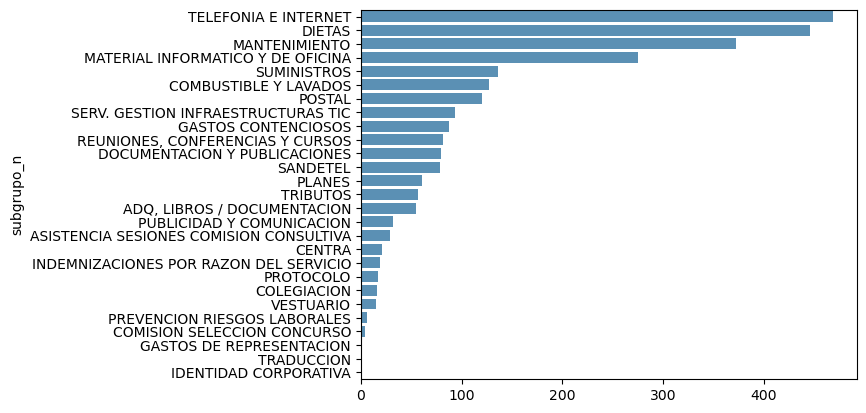

In [45]:
x=df['subgrupo_n'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [46]:
###Consolidación de la variable denominacion_acreedor

In [47]:
df['denominacion_acreedor'].value_counts()
# Obtener las frecuencias de la columna 'subgrupo'

denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
RAFAEL RUBIO NUÑEZ                       1
JUAN CARLOS GARCIA MELIAN                1
COMBUST, MAYO BAM SOLRED SA              1
BREAD&MORE SL                            1
FAMILYDIFERENT SL                        1
Name: count, Length: 355, dtype: int64

denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
RAFAEL RUBIO NUÑEZ                       1
JUAN CARLOS GARCIA MELIAN                1
COMBUST, MAYO BAM SOLRED SA              1
BREAD&MORE SL                            1
FAMILYDIFERENT SL                        1
Name: count, Length: 355, dtype: int64 Index(['SDAD AND PARA EL DESARROLLO DE LAS',
       'TELEFONICA DE ESPAÑA SAU TELEFONICA', 'VODAFONE ESPAÑA SA',
       'MANUEL MEDINA GUERRERO', 'SOCIEDAD ESTATAL CORREOS Y TELEGRAF',
       'UTE TDE TME DCLXXX', 'PURIFY HISPANIA SL', 'ENRIQUE GAVIRA SANCHEZ',
       'SOLRED SA', 'PEDREGOSA SL',
       ...
       'ISAAC MARTIN DELGADO', 'JOSE FELIX ONTAÑON CARMONA',
       'FRANCISCO JAVIER MARTIN CAVANNA', 'LAURA CHAQUES BONAFONT',
       'MARTIN MARIA RAZQUIN

<Axes: ylabel='denominacion_acreedor'>

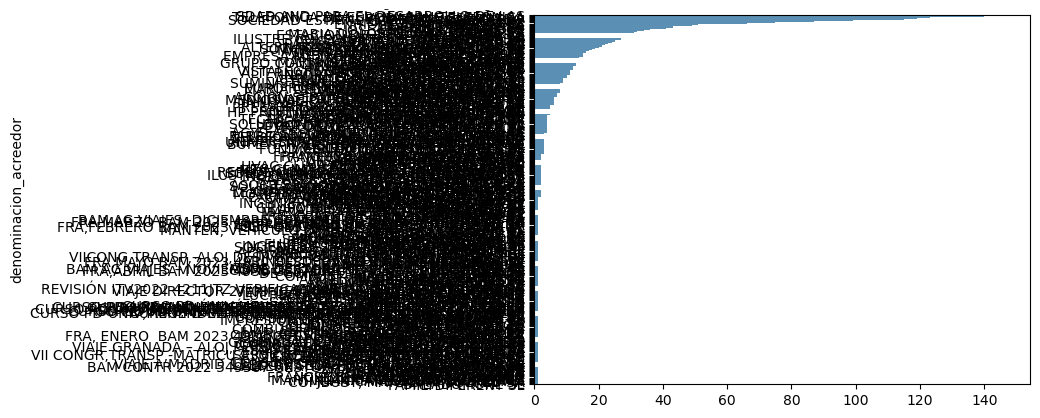

In [48]:
x=df['denominacion_acreedor'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

df['denominacion_acreedor']

In [50]:
import unicodedata
# Función para eliminar tildes
def quitar_tildes(texto):
    # Check if the input is a string, if not convert to string
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
def consolidar_acre(x):
  if x=="AMADOR MARTINEZ HERRERA" or x=="AMADOR MARTNEZ HERRERA":
    return "AMADOR MARTINEZ HERRERA"
  elif x=="ARTES GRAFICA MORENO SL" or x=="ARTES GRAFICA MORENO SLL" or x=="ARTES GRAFICAS MORENO SL":
    return "ARTES GRAFICAS MORENO SL"
  elif x=="JESUS JIMENEZ LOPEZ" or x=="JESUS JIMENEZ LOPEZ" or x=="JESUS JIMINEZ LOPEZ" or x=="JJESUS JIMENEZ LOPEZ":
    return "JESUS JIMENEZ LOPEZ"
  elif x=="RICOH ESPANA SLU" or x=="RICOH ESPANA SLU" or x=="RICOH ESPANA, SLU":
    return "RICOH ESPANA, SLU"
  elif x=="SOLUTIA INNOVAWORD TECHNOLOGIES SL" or x=="SOLUTIA INNOVAWORLD TECHNOLOGIES S" or x=="SOLUTIA INNOVAWORLD TECHNOLOGIES, S":
    return "SOLUTIA INNOVAWORD TECHNOLOGIES SL"
  elif x=="TK ELEVADORES ESPANA SL" or x=="TK ELEVADORES ESPANAA SL":
    return "TK ELEVADORES ESPANAA SL"
  elif x=="TK ELEVADORES ESPANA SL" or x=="TK ELEVADORES ESPANAA SL":
    return "TK ELEVADORES ESPANAA SL"
  elif x=="VISTALEGRE SOLUTIONS S,L," or x=="TK ELEVADORES ESPANAA SL":
    return "VISTALEGRE SOLUTIONS S,L"
  else:
    return x

df['denominacion_acreedor'] = df['denominacion_acreedor'].map(lambda x: consolidar_acre(x))

# Aplicar la función a una columna
df['denominacion_acreedor_sin'] = df['denominacion_acreedor'].apply(quitar_tildes)


denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
FUNDACIÓN NOVAGOB                        1
JESUS JIMENEZ LO PEZ                     1
AGUSTI CERRILLO MARTINEZ                 1
ANA ISABEL BELTRAN GOMEZ                 1
FAMILYDIFERENT SL                        1
Name: count, Length: 351, dtype: int64 Index(['SDAD AND PARA EL DESARROLLO DE LAS',
       'TELEFONICA DE ESPAÑA SAU TELEFONICA', 'VODAFONE ESPAÑA SA',
       'MANUEL MEDINA GUERRERO', 'SOCIEDAD ESTATAL CORREOS Y TELEGRAF',
       'UTE TDE TME DCLXXX', 'PURIFY HISPANIA SL', 'ENRIQUE GAVIRA SANCHEZ',
       'SOLRED SA', 'PEDREGOSA SL',
       ...
       'CONSEJO GENERAL DE LA ABOGACIA ESPA',
       'VIAJE A MADRID 13,10 GESTORA DE VIAJES Y NEGOCIOS SL',
       'ALTERNATIVA ECOLÓGICA ANDALUCIA SL',
   

<Axes: ylabel='denominacion_acreedor'>

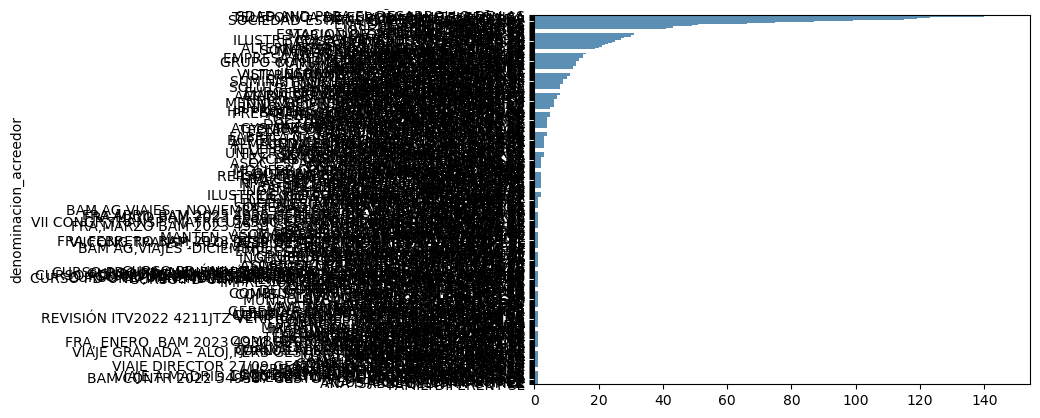

In [51]:
x=df['denominacion_acreedor'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [52]:
df['denominacion_acreedor_sin'].value_counts()
# Obtener las frecuencias de la columna 'subgrupo'

denominacion_acreedor_sin
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPANA SAU TELEFONICA    140
VODAFONE ESPANA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
FUNDACION NOVAGOB                        1
JESUS JIMENEZ LO PEZ                     1
AGUSTI CERRILLO MARTINEZ                 1
ANA ISABEL BELTRAN GOMEZ                 1
FAMILYDIFERENT SL                        1
Name: count, Length: 325, dtype: int64

Procesamiento de la variable fecha_entrada_registro

In [54]:
# 1.La columna 'fecha_entrada_registro' está en formato datetime
df['fecha_entrada_registro'] = pd.to_datetime(df['fecha_entrada_registro'], errors='coerce')

# 2. Extraer atributos temporales relevantes
df['mes'] = df['fecha_entrada_registro'].dt.month.astype(int)  # Mes del año (1-12)
df['bimestre'] = (df['fecha_entrada_registro'].dt.month - 1) // 2 + 1  # Bimestre (1-6)
df['trimestre'] = df['fecha_entrada_registro'].dt.quarter  # Trimestre (1-4)
df['semana_anio'] = df['fecha_entrada_registro'].dt.isocalendar().week  # Semana del año (1-52)
df['anio'] = df['fecha_entrada_registro'].dt.year  # Año

# 3. Calcular importes medios por diferentes períodos

# Importe medio por mes
importe_medio_mes = df.groupby(['anio', 'mes'])['importe_total'].mean().reset_index()
importe_medio_mes.columns = ['anio', 'mes', 'importe_medio_mes']

# Importe medio por bimestre
importe_medio_bimestre = df.groupby(['anio', 'bimestre'])['importe_total'].mean().reset_index()
importe_medio_bimestre.columns = ['anio', 'bimestre', 'importe_medio_bimestre']

# Importe medio por trimestre
importe_medio_trimestre = df.groupby(['anio', 'trimestre'])['importe_total'].mean().reset_index()
importe_medio_trimestre.columns = ['anio', 'trimestre', 'importe_medio_trimestre']

# Importe medio por semana del año
importe_medio_semana = df.groupby(['anio', 'semana_anio'])['importe_total'].mean().reset_index()
importe_medio_semana.columns = ['anio', 'semana_anio', 'importe_medio_semana']

# 4. Agregar estas nuevas tablas de importes medios al DataFrame original (opcional)
df = pd.merge(df, importe_medio_mes, on=['anio', 'mes'], how='left')
df = pd.merge(df, importe_medio_bimestre, on=['anio', 'bimestre'], how='left')
df = pd.merge(df, importe_medio_trimestre, on=['anio', 'trimestre'], how='left')
df = pd.merge(df, importe_medio_semana, on=['anio', 'semana_anio'], how='left')

# Guardar el DataFrame con las nuevas columnas en un archivo XLSX si es necesario
df.to_excel('data_with_fechas.xlsx', index=False)


In [55]:
print(df.dtypes)

fecha_entrada_registro       datetime64[ns]
importe_total                       float64
grupo_gastos                         object
subgrupo                             object
denominacion_factura                 object
denominacion_acreedor                object
grupo_gastos_n                       object
df_GrupoGastos                        int64
subgrupo_n                           object
denominacion_acreedor_sin            object
mes                                   int64
bimestre                              int32
trimestre                             int32
semana_anio                          UInt32
anio                                  int32
importe_medio_mes                   float64
importe_medio_bimestre              float64
importe_medio_trimestre             float64
importe_medio_semana                float64
dtype: object


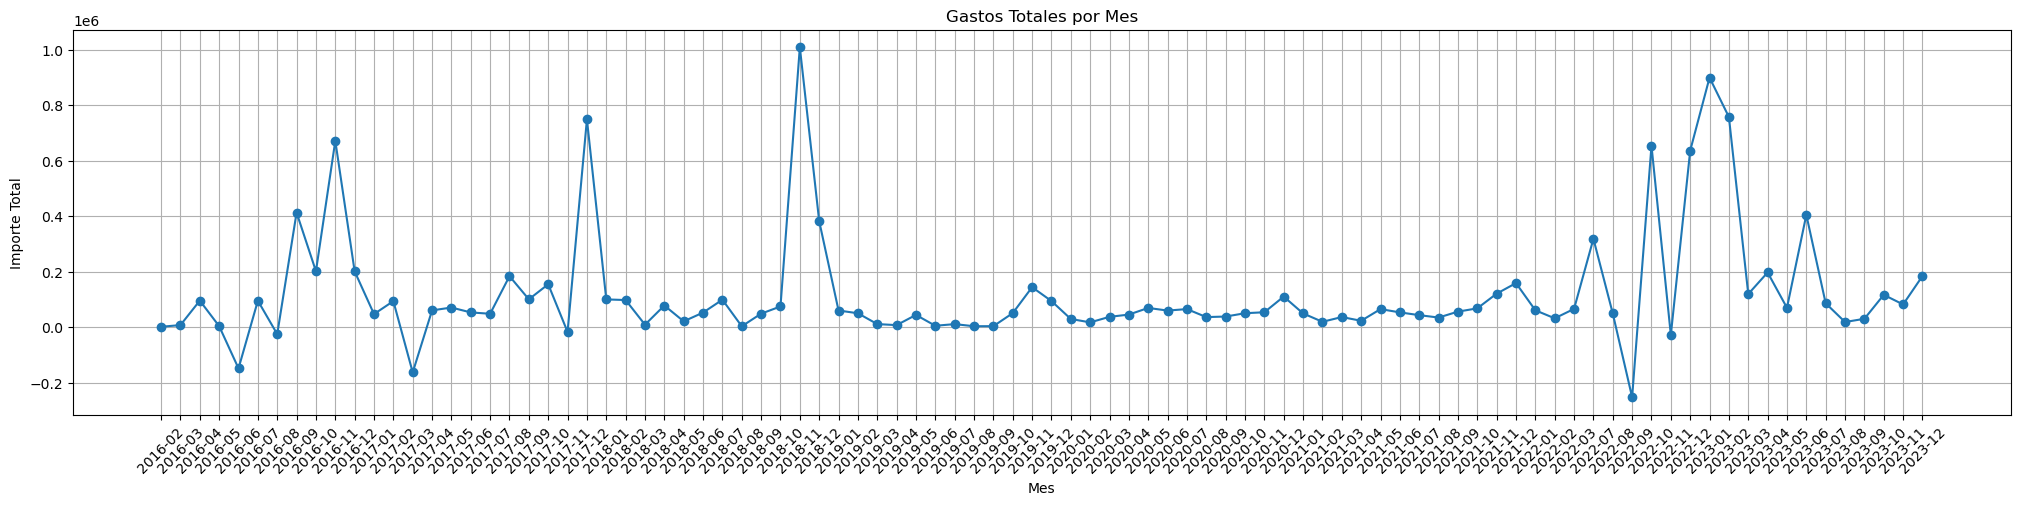

In [56]:
# Convertir la columna a datetime
df['fecha_entrada_registro'] = pd.to_datetime(df['fecha_entrada_registro'])

# Crear una nueva columna para el mes
df['mes'] = df['fecha_entrada_registro'].dt.to_period('M')

# Agrupar por mes
gastos_por_mes = df.groupby('mes')['importe_total'].sum()

# Graficar
plt.figure(figsize=(25, 5))
plt.plot(gastos_por_mes.index.astype(str), gastos_por_mes.values, marker='o')
plt.title('Gastos Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Importe Total')
plt.xticks(rotation=45)
plt.grid()
plt.show()


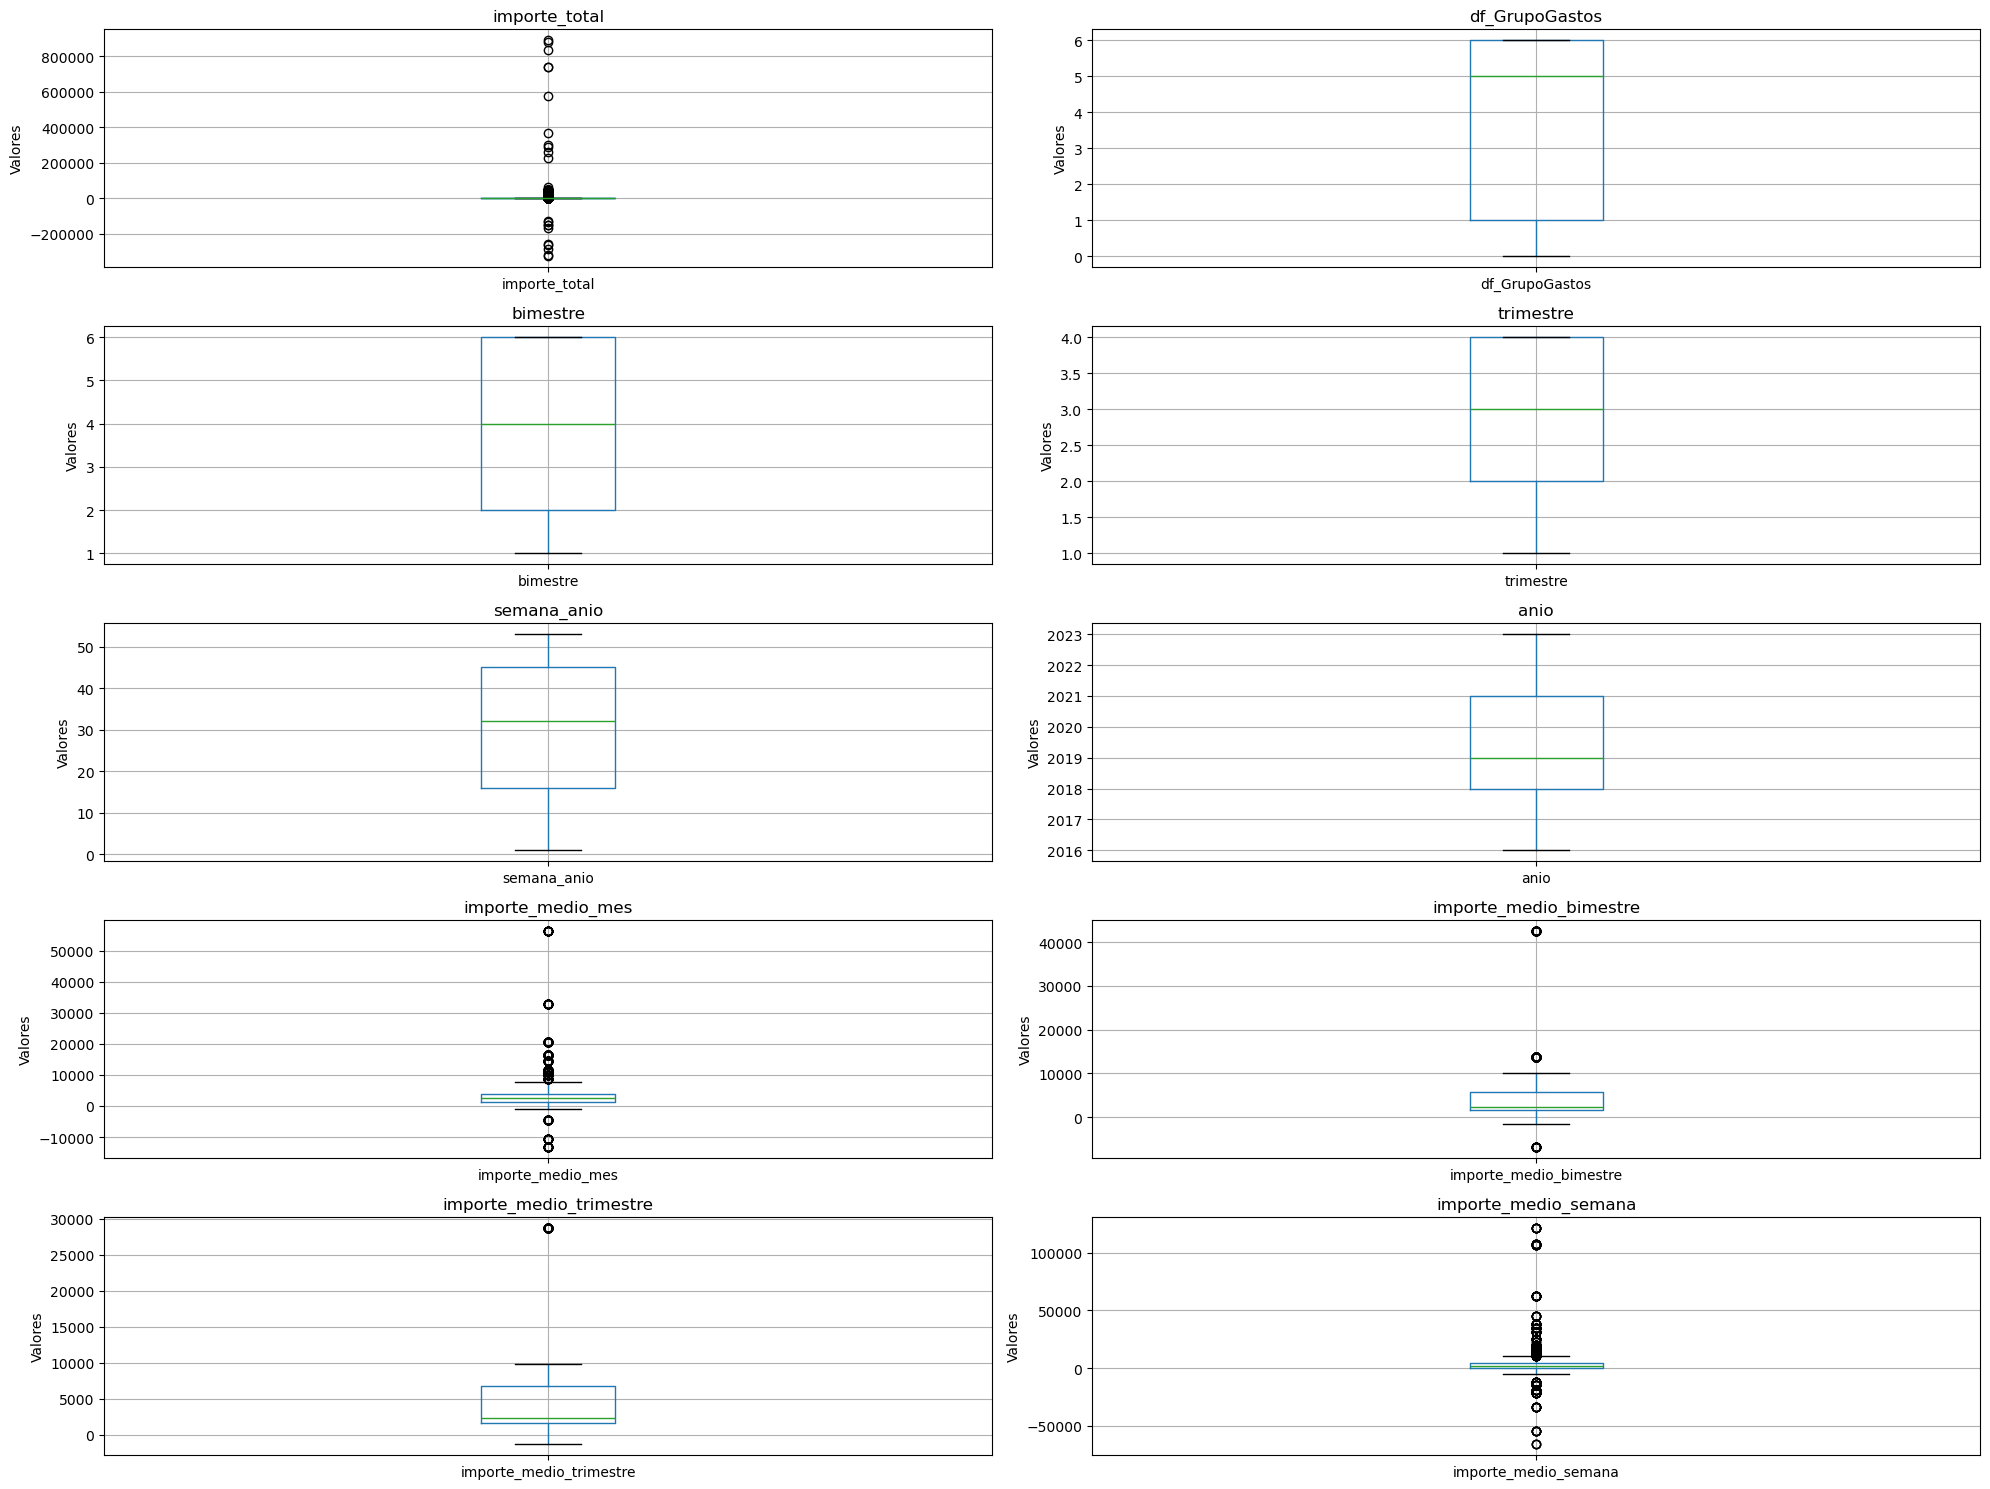

In [57]:
# Lista de nombres de las columnas numéricas
columnas = df.select_dtypes(include=['number']).columns

# Configurar la figura y los ejes para los subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 15))

# Dibujar cada boxplot en su correspondiente subplot
for i, ax in enumerate(axes.flatten()):
    if i < len(columnas):  # Asegúrate de no exceder el número de columnas
        df.boxplot(column=columnas[i], ax=ax)
        ax.set_title(columnas[i])
        ax.set_ylabel('Valores')  # Etiqueta para el eje y

# Ajustar el layout
plt.tight_layout()
plt.show()

##Correlación de las variables

<Axes: >

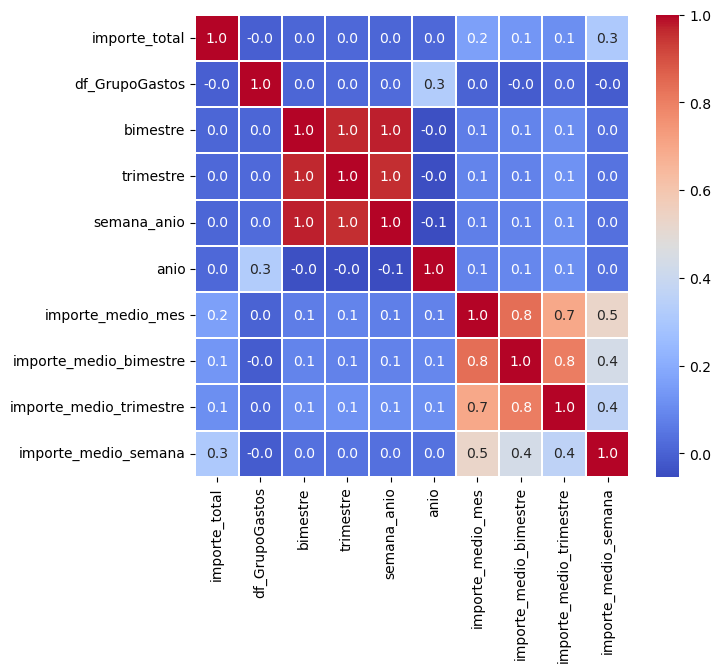

In [59]:
f,ax = plt.subplots(figsize=(7,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'coolwarm', ax=ax)

Las variables importe_medio_mes,  importe_medio_bimestre,  importe_medio_trimestre y importe_medio_semana son variables que están correlacionadas ya que se han calculado desde la variable importe total. Eliminamos importe_medio_bimestre , importe_medio_trimestre y importe_medio_semana. De igual manera pasa con las variables mes, bimestre,trimestre, semana_anio y anio. 

In [61]:
df.drop(['importe_medio_bimestre','importe_medio_trimestre','importe_medio_semana','bimestre','trimestre','semana_anio','anio'], axis=1, inplace=True)

<Axes: >

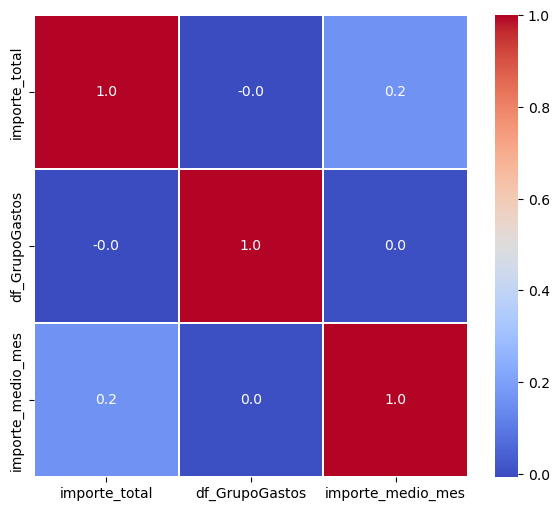

In [62]:
f,ax = plt.subplots(figsize=(7,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidths=.18, fmt= '.1f',cmap= 'coolwarm', ax=ax)

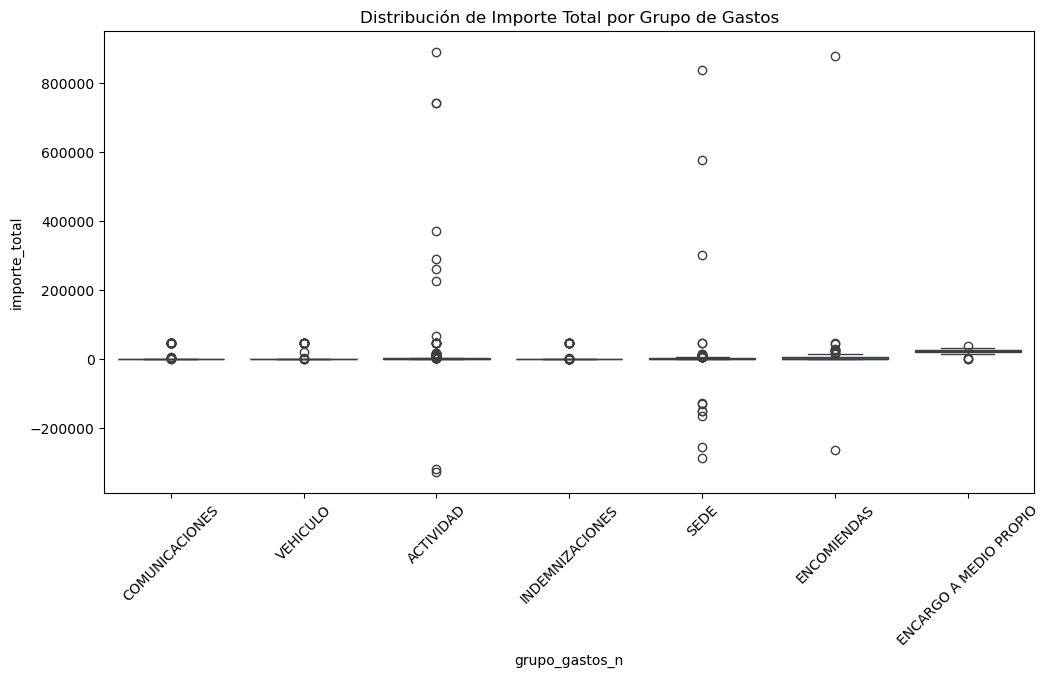

In [63]:
# Boxplot para ver la distribución de importe_total por grupo_gastos
plt.figure(figsize=(12, 6))
sns.boxplot(x='grupo_gastos_n', y='importe_total', data=df)
plt.title('Distribución de Importe Total por Grupo de Gastos')
plt.xticks(rotation=45)
plt.show()


Exportación de la base de datos limpia sin dummies

In [65]:
print(df.shape)
print(df.info())

df.to_excel("Basededatos_sindummies.xlsx",)

(2704, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha_entrada_registro     2704 non-null   datetime64[ns]
 1   importe_total              2704 non-null   float64       
 2   grupo_gastos               2704 non-null   object        
 3   subgrupo                   2704 non-null   object        
 4   denominacion_factura       2704 non-null   object        
 5   denominacion_acreedor      2703 non-null   object        
 6   grupo_gastos_n             2704 non-null   object        
 7   df_GrupoGastos             2704 non-null   int64         
 8   subgrupo_n                 2704 non-null   object        
 9   denominacion_acreedor_sin  2704 non-null   object        
 10  mes                        2704 non-null   period[M]     
 11  importe_medio_mes          2704 non-null   float64       


##Variables dummies

In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Definir el OneHotEncoder con la opción de salida como pandas DataFrame
encoder = OneHotEncoder(sparse_output=False)


# Codificación de la columna "denominacion_acreedor_sin"
acreedor_column = df[["denominacion_acreedor_sin"]]
acreedor_encoded = encoder.fit_transform(acreedor_column)

# Crear un DataFrame con los nombres de las columnas generadas por OneHotEncoder
acreedor_encoded_df = pd.DataFrame(acreedor_encoded, columns=encoder.get_feature_names_out(["denominacion_acreedor_sin"]))
df = pd.concat([df, acreedor_encoded_df], axis=1)

df.to_excel('Basededatos_dummies2.xlsx', index=False)

In [70]:
df.columns

Index(['fecha_entrada_registro', 'importe_total', 'grupo_gastos', 'subgrupo',
       'denominacion_factura', 'denominacion_acreedor', 'grupo_gastos_n',
       'df_GrupoGastos', 'subgrupo_n', 'denominacion_acreedor_sin',
       ...
       'denominacion_acreedor_sin_VISTALEGRE IMPRESORES SL',
       'denominacion_acreedor_sin_VISTALEGRE SOLUTIONS  S,L,',
       'denominacion_acreedor_sin_VISTALEGRE SOLUTIONS, S,L,',
       'denominacion_acreedor_sin_VISTALEGRE SUMINISTRO INTEGRAL A OF',
       'denominacion_acreedor_sin_VIVE TU MOVIL &DEIVIS REPAIRS S,L,',
       'denominacion_acreedor_sin_VODAFONE ESPANA SA',
       'denominacion_acreedor_sin_WOLTERS KLUWER ESPANA SA',
       'denominacion_acreedor_sin_XIA ZHU',
       'denominacion_acreedor_sin_YOLANDA RUIZ PENA',
       'denominacion_acreedor_sin_nan'],
      dtype='object', length=337)